In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Mini-TP distance point-droite

On va implémenter les formules démontrées en TD, en python.
- 1. Initialiser une droite de paramètres aléatoires (définissez une fonction). 

- 2. Représentez cette droite dans le plan (définissez une fonction display).
(voir détails plus bas)

- 3. Calculez la distance (signée) entre un point quelconque et la droite (définissez une fonction distancePoint_Droite).

- 4. Affichez la distance (signée) à la droite avec un dégradé de couleurs.


## 0. On vous montre qq commandes

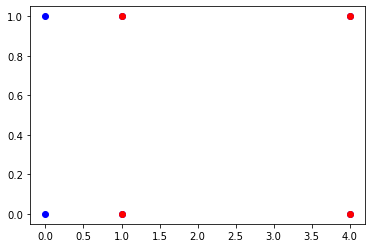

In [2]:
# voici les données brutes, sans le "rajout du 1"
X = np.array([[0,0],[0,1],[1,0],[1,1],[4,0],[4,1]])
T = np.array([-1,-1,1,1,1,1])
plt.scatter(X[:,0], X[:,1], color="blue")
plt.scatter(X[T==1,0], X[T==1,1], color="red")

In [3]:
# voici les données après le "rajout du 1"
N=6
Xaug = np.hstack((np.ones((N,1)), X)) 
X = Xaug
W1 = X[T==-1,1:] # points of class "-1"
W2 = X[T== 1,1:] # points of class "+1"
plt.plot(W1[:,0], W1[:,1], 'r+') # points of class "-1"
plt.plot(W2[:,0], W2[:,1], 'bx') # points of class "+1"

## 1. Initialiser une droite de paramètres aléatoires (définissez une fonction).

In [4]:
def initializeWeights():
    D=3
    wparameters = (np.random.random((D))-0.5)/D**0.5
    return wparameters
np.random.seed(43)
w = initializeWeights()
w

array([-0.22224835,  0.0629696 , -0.21166183])

## 2. Représentez cette droite dans le plan (définissez une fonction display).

- à partir de $\vec w \in \mathbb{R}^3$, définissez $w_0$ et $\vec w'\in \mathbb{R}^2$, comme dans le TD (exo *Distance point-droite (Démonstration)*)
- définissez le vecteur unitaire donnant la direction orthogonale à la droite, $$\vec u =\frac{ \vec w'}{ ||\vec w'||}$$
- définissez la distance entre l'origine du repère (point de coordonnées (0,0)) et la droite. Rappel: c'est $$-\frac{w_0}{||w'||}$$
- Déduisez-en (pas *directement* fait en TD!) la position du point qui est le projeté de l'origine sur la droite.  Ce point sera le milieu du segement de droite que vous tracerez
- Calculez le vecteur orthogonal au vecteur $\vec w$, qui sera donc colinéaire à la droite. Cela peut se faire par une rotation de 90 degrés ($\pi/2$).
- Ensuite, les 2 extremités du segment peuvent etre obtenues comme la somme et la différence des 2 vecteurs qu'on vient de calculer.

Attention au fait que la droite est caractérisée par 3 paramètres, mais que les vecteurs et points du plan sont repérés par seulement 2 coordonnées.

### Alternative: revenir à la formulation "y=ax+b" et traiter les cas particuliers à part

In [5]:
## Il peut etre utile de definir la norme d'un vecteur:
def norme(w):
    return ((w**2).sum())**0.5

In [6]:
def display(X, T, wInit, iteration):
    w=wInit.copy()
    w0= w[0] # c'est la partie qui caractérise la distance à l'origine, qui détermine l'ordonnée à l'origine (mais ce n'est pas égal à ça)
    ## on normalise les composantes du vrai vecteur w 
    wprime = w[1:] # /(w[1]**2+w[2]**2)**0.5
    print(w, w0, wprime)
    
    u_w = (wprime/norme(wprime)) # vecteur unitaire donnant la direction
    distance_origine_droite = -w0/norme(wprime)
    projete_de_Origine_sur_droite = u_w * distance_origine_droite
    print("projete_de_Origine_sur_droite", projete_de_Origine_sur_droite)
    vecteur_Orthogonal_A_La_Droite = np.array([wprime[1],-wprime[0]])
## on peut vérifier que ces choses donnent 0:
# vecteur_Orthogonal_A_La_Droite = np.array([wprime[1],-wprime[0]])
# wprime @ vecteur_Orthogonal_A_La_Droite

    ## on définit maintenant les coordonnées du segment de droite (ce sont 2 vecteurs)
    extremite1 = projete_de_Origine_sur_droite + vecteur_Orthogonal_A_La_Droite*2
    extremite2 = projete_de_Origine_sur_droite - vecteur_Orthogonal_A_La_Droite*2
    
    ## on extrait les abcisses et les ordonnées de ces 2 vecteurs:
    extremites_abscisses = np.array([extremite1[0], extremite2[0]])
    extremites_ordonnees = np.array([extremite1[1], extremite2[1]])
    
    plt.figure(1)
    ## on affiche les points de données:
    Class1 = X[T==-1,1:] # points of class "-1"
    Class2 = X[T== 1,1:] # points of class "+1"
    plt.plot(Class1[:,0], Class1[:,1], 'r+') # points of class "-1"
    plt.plot(Class2[:,0], Class2[:,1], 'bx') # points of class "+1"
    
    ## on affiche le segment de droite:
    cmap = cm.jet
    colorGradient=cmap(np.linspace(0.0,1.0,12))
    plt.plot(extremites_abscisses, extremites_ordonnees,  color=colorGradient[iteration%(len(colorGradient))])
    print(extremites_abscisses)
    

    ## autre méthode
    w = wInit.copy()
    if w[2] != 0.0:
        a = - w[1]/w[2]
        b = -w[0]/w[2]
        x = np.linspace(-0.5,1)
        y = x * a + b
    else:
        # w0 + w1 x + 0 = 0 => x = -w0/w1
        y = np.linspace(-0.5,1)
        x = np.ones(len(y))*-w[0]/w[1]

    
    plt.figure(1)
    Class1 = X[T==-1,1:] # points of class "-1"
    Class2 = X[T== 1,1:] # points of class "+1"
    plt.plot(Class1[:,0], Class1[:,1], 'r+') # points of class "-1"
    plt.plot(Class2[:,0], Class2[:,1], 'bx') # points of class "+1"
    cmap = cm.jet
    colorGradient=cmap(np.linspace(0.0,1.0,12))
    plt.plot(x,y, color='red')
   
    plt.scatter([projete_de_Origine_sur_droite[0],projete_de_Origine_sur_droite[0]],[projete_de_Origine_sur_droite[1], projete_de_Origine_sur_droite[1]], color='k')


In [7]:
display(X,T, w,0)

[-0.22224835  0.0629696  -0.21166183] -0.22224834971817833 [ 0.0629696  -0.21166183]
projete_de_Origine_sur_droite [ 0.28698105 -0.96463908]
[-0.1363426  0.7103047]


[1 1 1] 1 [1 1]
projete_de_Origine_sur_droite [-0.5 -0.5]
[ 1.5 -2.5]


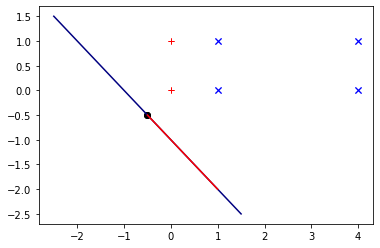

In [8]:
w = np.array([1,1,1])
display(X,T, w,0)

[1.41421356 1.         1.        ] 1.4142135623730951 [1. 1.]
projete_de_Origine_sur_droite [-0.70710678 -0.70710678]
[ 1.29289322 -2.70710678]


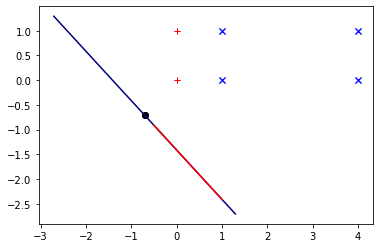

In [9]:
w = np.array([2**0.5,1,1])
display(X,T, w,0)

In [10]:
w = np.array([1,1,0])
display(X,T, w,0)

[1 1 0] 1 [1 0]
projete_de_Origine_sur_droite [-1. -0.]
[-1. -1.]


In [11]:
w = initializeWeights()
display(X,T, w,0)

[-0.14977065 -0.09980131  0.20734813] -0.149770652743589 [-0.09980131  0.20734813]
projete_de_Origine_sur_droite [-0.28227207  0.58645106]
[ 0.13242418 -0.69696833]


## 3. Calculez la distance (signée) entre un point quelconque et la droite (définissez une fonction distancePoint_Droite).

Remarque: la formule est contenue dans la question 3 de l'exercice "3.2  Distance point-droite (Démonstration)"


In [12]:
def distancePoint_Droite(x, w):
    return x @ w / norme(w[1:])

In [13]:
## test: il faudrait que votre fonction puisse
## calculer des séries de points X:
N = 10 # nombre de points
D = 3 # dimension de chaque point
x = np.random.random((N, D))
x, distancePoint_Droite(x, w)

(array([[0.66609021, 0.54116221, 0.02901382],
        [0.7337483 , 0.39495002, 0.80204712],
        [0.25442113, 0.05688494, 0.86664864],
        [0.221029  , 0.40498945, 0.31609647],
        [0.0766627 , 0.84322469, 0.84893915],
        [0.97146509, 0.38537691, 0.95448813],
        [0.44575836, 0.66972465, 0.08250005],
        [0.89709858, 0.2980035 , 0.26230482],
        [0.00512955, 0.54320252, 0.47559637],
        [0.63637368, 0.97820413, 0.90866276]]),
 array([-0.64208164,  0.07384297,  0.59064011, -0.03467865,  0.34934145,
         0.06063559, -0.50624249, -0.47676644,  0.18961465, -0.01967108]))

## 4. Affichez la distance (signée) à la droite avec un dégradé de couleurs.

On vous aide pas mal. Vous pouvez aller voir la doc. de `pyplot.contourf`

In [14]:
h = 0.002 ## grid mesh size
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
## xx et yy définissent une grille de valeurs de x et y qui 
## couvrent une portion du plan (un carré)
n = (xx.ravel()).shape[0]
Xs=np.c_[np.ones(n), xx.ravel(), yy.ravel()]
## Xs définit les coordonnées (x,y) des points dans ce carré
## notez qu'on a "ajouté les 1" aux points (X)

In [15]:
xx.shape, xx, 

((2000, 2000),
 array([[-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998],
        [-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998],
        [-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998],
        ...,
        [-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998],
        [-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998],
        [-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998]]))

In [16]:
xx.ravel().shape, xx.ravel()

((4000000,), array([-2.   , -1.998, -1.996, ...,  1.994,  1.996,  1.998]))

[-0.14977065 -0.09980131  0.20734813] -0.149770652743589 [-0.09980131  0.20734813]
projete_de_Origine_sur_droite [-0.28227207  0.58645106]
[ 0.13242418 -0.69696833]


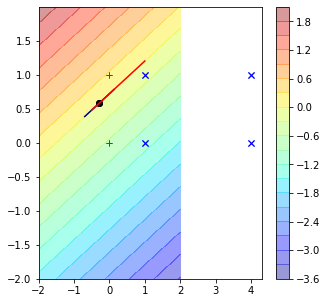

In [17]:
Z = distancePoint_Droite(Xs, w)
Z = Z.reshape(xx.shape)

plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
plt.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=0.4, levels=20)
plt.colorbar()
display(X,T, w,0)
